## Bikes

## 1.1 Problem Statement
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike
sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You
must predict the total count of bikes rented during each hour covered by the test set, using only
information available prior to the rental period.

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('train_bikes.csv', parse_dates=['datetime']) # loading the training data at df

In [4]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
df.tail() # looking at the training data from end

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

<Axes: xlabel='season', ylabel='count'>

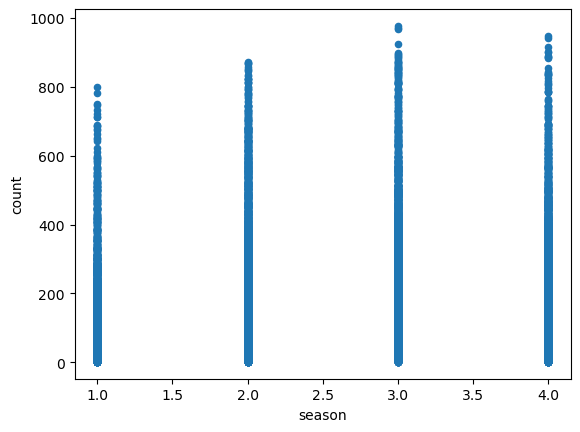

In [7]:
df.plot.scatter(x= 'season',y='count')  # plotting the counts based on the season
                                        #Represents the season of the year:
                                        #Spring,Summer,Fall,Winter

<Axes: xlabel='holiday', ylabel='count'>

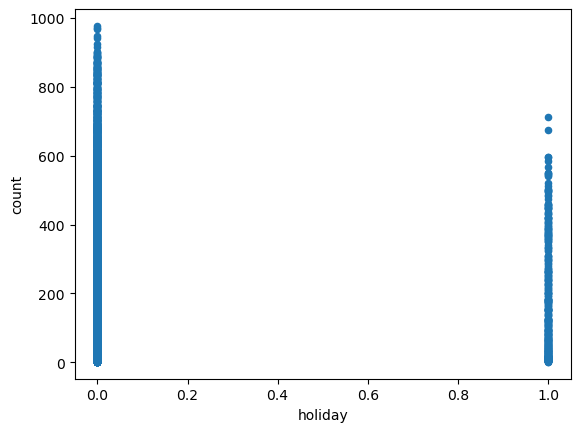

In [8]:
df.plot.scatter(x='holiday',y='count') # plotting the counts based on the holidays YES/No

<Axes: xlabel='workingday', ylabel='count'>

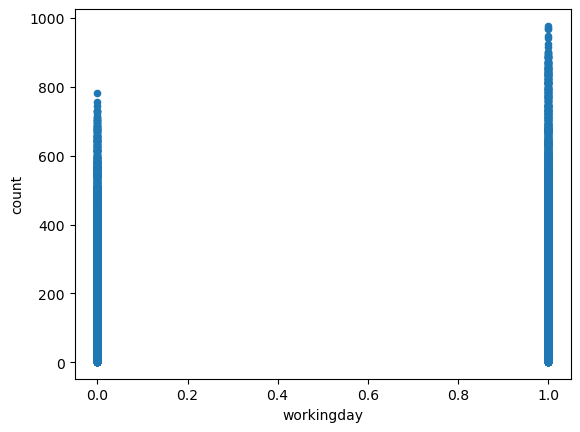

In [9]:
df.plot.scatter(x= 'workingday',y='count') # plotting the counts based on working day

<Axes: xlabel='weather', ylabel='count'>

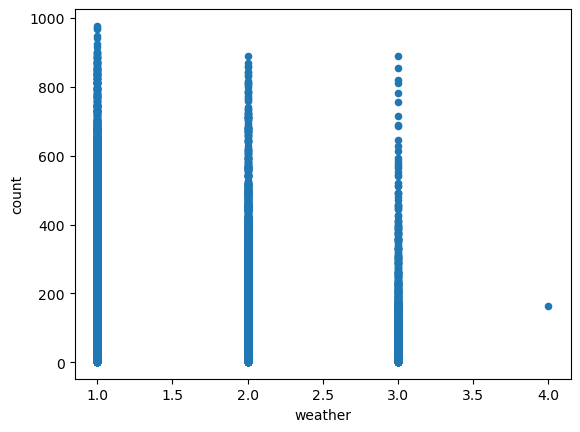

In [10]:
df.plot.scatter(x= 'weather',y='count') # plotting the counts based on the weather1 → Clear / Few clouds,Mist / CloudyLight snow / Rain,Heavy rain / Snow / Fog

<Axes: xlabel='temp', ylabel='count'>

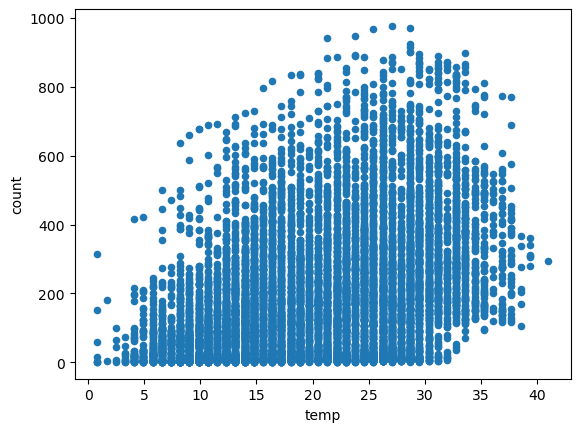

In [11]:
df.plot.scatter(x= 'temp',y='count') # plotting the counts based on the temparature

<Axes: xlabel='atemp', ylabel='count'>

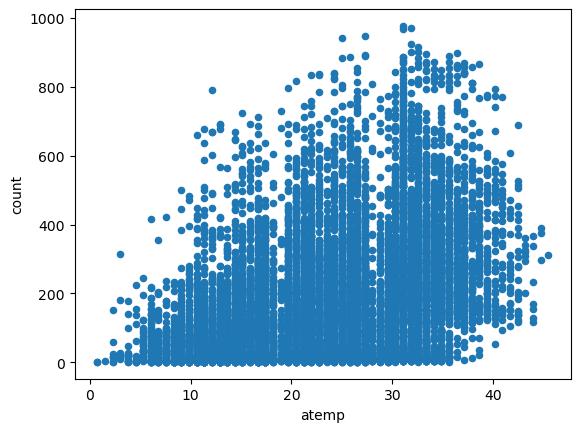

In [12]:
df.plot.scatter(x= 'atemp',y='count') # plotting the counts based on atemp

<Axes: xlabel='humidity', ylabel='count'>

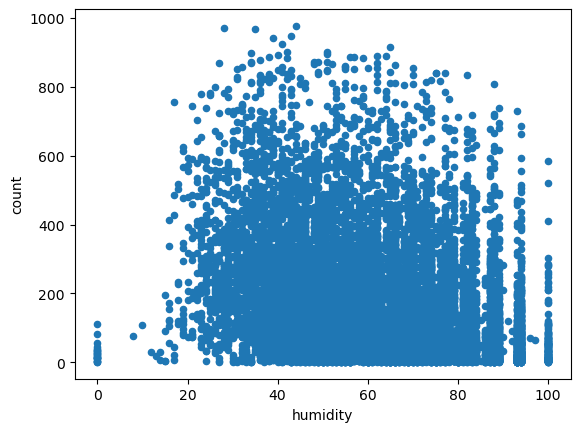

In [13]:
df.plot.scatter(x= 'humidity',y='count')  # plotting the counts based on humidity

<Axes: xlabel='windspeed', ylabel='count'>

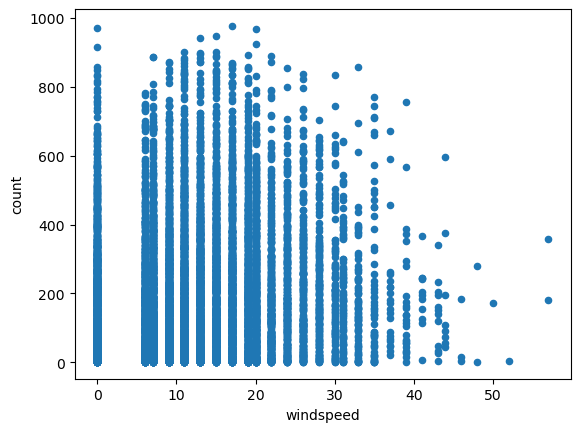

In [14]:
df.plot.scatter(x= 'windspeed',y='count') # plotting the counts based on windspeed

<Axes: xlabel='casual', ylabel='count'>

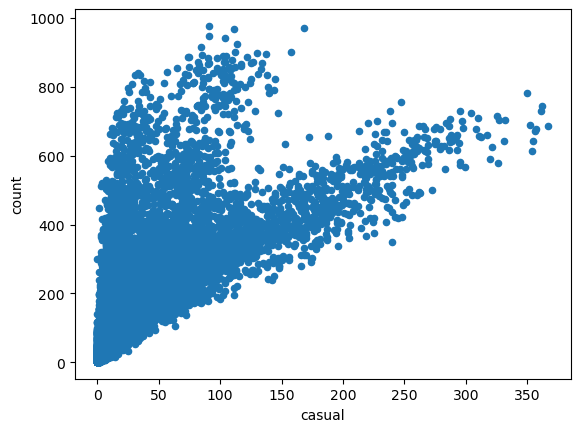

In [15]:
df.plot.scatter(x= 'casual',y='count') # plotting the counts based casual user

In [16]:
df.info() # observing the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [17]:
df.describe().T  
# Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset's distribution

count                           mean                  min  \
datetime      10886  2011-12-27 05:56:22.399411968  2011-01-01 00:00:00   
season      10886.0                       2.506614                  1.0   
holiday     10886.0                       0.028569                  0.0   
workingday  10886.0                       0.680875                  0.0   
weather     10886.0                       1.418427                  1.0   
temp        10886.0                       20.23086                 0.82   
atemp       10886.0                      23.655084                 0.76   
humidity    10886.0                       61.88646                  0.0   
windspeed   10886.0                      12.799395                  0.0   
casual      10886.0                      36.021955                  0.0   
registered  10886.0                     155.552177                  0.0   
count       10886.0                     191.574132                  1.0   

                            25%                  50%                  75%  \
datetime    2011-07-02 07:15:00  2012-01-01 20:30:00  2012-07-01 12:45:00   
season                      2.0                  3.0                  4.0   
holiday                     0.0                  0.0                  0.0   
workingday                  0.0                  1.0                  1.0   
weather                     1.0                  1.0                  2.0   
temp                      13.94                 20.5                26.24   
atemp                    16.665                24.24                31.06   
humidity                   47.0                 62.0                 77.0   
windspeed                7.0015               12.998              16.9979   
casual                      4.0                 17.0                 49.0   
registered                 36.0                118.0                222.0   
count                      42.0                145.0                284.0   

                            max         std  
datetime    2012-12-19 23:00:00         NaN  
season                      4.0    1.116174  
holiday                     1.0    0.166599  
workingday                  1.0    0.466159  
weather                     4.0    0.633839  
temp                       41.0     7.79159  
atemp                    45.455    8.474601  
humidity                  100.0   19.245033  
windspeed               56.9969    8.164537  
casual                    367.0   49.960477  
registered                886.0  151.039033  
count                     977.0  181.144454

In [18]:
df_test=pd.read_csv('test_bikes.csv')  # loading the test data

In [19]:
df_test.head() #looking at the 1st 5 rows of the test data

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [20]:
df_test.tail()  # last 5 rows of the test data

datetime  season  holiday  workingday  weather   temp  \
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
6488  12.880        60    11.0014  
6489  12.880        60    11.0014  
6490  12.880        60    11.0014  
6491  13.635        56     8.9981  
6492  13.635        65     8.9981

In [21]:
df_test.info()  # observing the data types of the columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [22]:
df_test.describe().T # Generate descriptive statistics that summarize the central tendency,
                     # dispersion and shape of a dataset's distribution for test data

count       mean        std    min      25%      50%      75%  \
season      6493.0   2.493300   1.091258   1.00   2.0000   3.0000   3.0000   
holiday     6493.0   0.029108   0.168123   0.00   0.0000   0.0000   0.0000   
workingday  6493.0   0.685815   0.464226   0.00   0.0000   1.0000   1.0000   
weather     6493.0   1.436778   0.648390   1.00   1.0000   1.0000   2.0000   
temp        6493.0  20.620607   8.059583   0.82  13.9400  21.3200  27.0600   
atemp       6493.0  24.012865   8.782741   0.00  16.6650  25.0000  31.0600   
humidity    6493.0  64.125212  19.293391  16.00  49.0000  65.0000  81.0000   
windspeed   6493.0  12.631157   8.250151   0.00   7.0015  11.0014  16.9979   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         40.1800  
atemp        50.0000  
humidity    100.0000  
windspeed    55.9986

In [23]:
# installing the pandas profiling library. 
# It is used for a deeper understanding than the normal Dataframe.describe() method
!pip install pandas-profiling

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached MarkupSafe-2.1.5.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [19 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
      exec(compile('''
      ~~~~^^^^^^^^^^^^
      # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ...<32 lines>...
      exec(compile(setup_py_code, filename, "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ''' % ('C:\\Users\\sushi\\AppData\\Local\\Temp\\pip-install-fz4jbosu\\htmlmin_4dd6035f88d54517b9bd503fd6992c7f\\setup.py',), "<pip-setuptools-caller>", "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\sushi\AppData\Local\Temp\pip-install-f

In [24]:
import pandas_profiling

C:\Users\sushi\AppData\Local\Temp\ipykernel_3540\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [25]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 499.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df.shape # printing the number of rows and columns

(10886, 12)

In [27]:
df.isnull().sum() #finding missing values 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [28]:
# method for creating the count plot based on hour for a given year
def plot_by_hour(data, year=None, agg='sum'):
    dd = data #Creates a reference to the dataset
    if year:
        dd = dd[dd.datetime.dt.year == year]

    dd.loc[:, 'hour'] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument

    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day

    return by_hour.plot(
        kind="bar",
        ylim=(0, 100000),
        figsize=(15, 10),
        width=0.9,
        title="Year = {0}".format(year)
    ) # returning the figure grouped by hour

C:\Users\sushi\AppData\Local\Temp\ipykernel_3540\2448899546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:, 'hour'] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument


<Axes: title={'center': 'Year = 2011'}, xlabel='hour'>

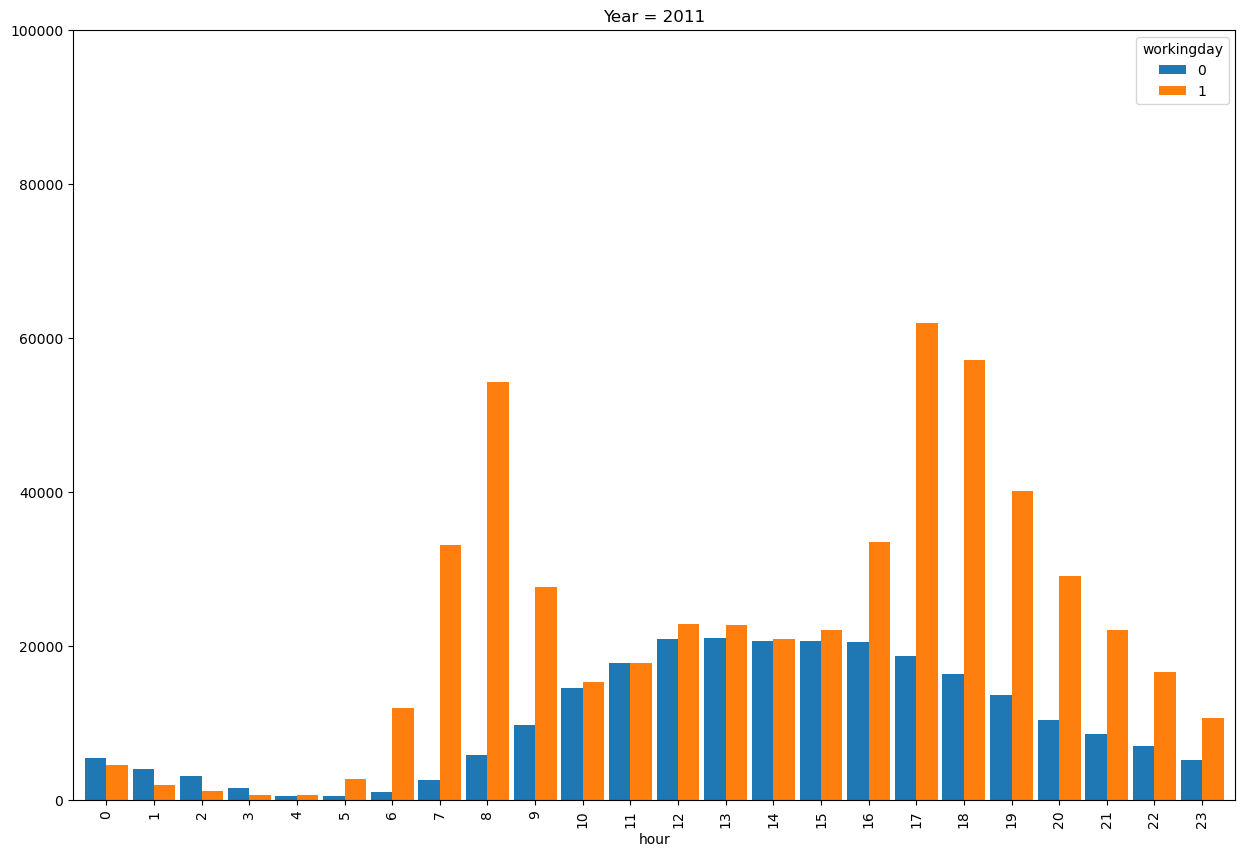

In [29]:
plot_by_hour(df,year=2011)# plotting the count plot based on hour for 2011

C:\Users\sushi\AppData\Local\Temp\ipykernel_3540\2448899546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:, 'hour'] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument


<Axes: title={'center': 'Year = 2012'}, xlabel='hour'>

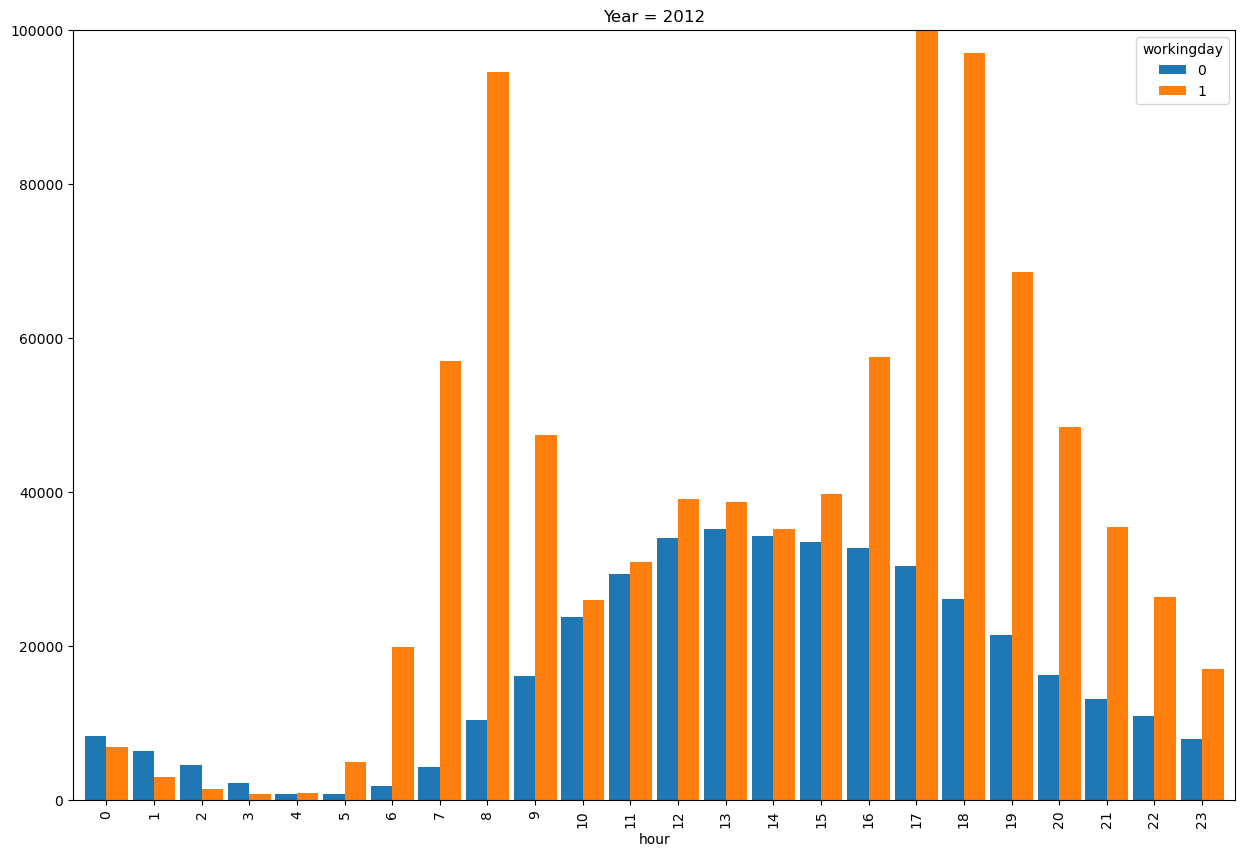

In [30]:
plot_by_hour(df,year=2012)  # plotting the count plot based on hour for 2012

<Axes: title={'center': 'Rent bikes per month in 2011 and 2012'}, xlabel='month'>

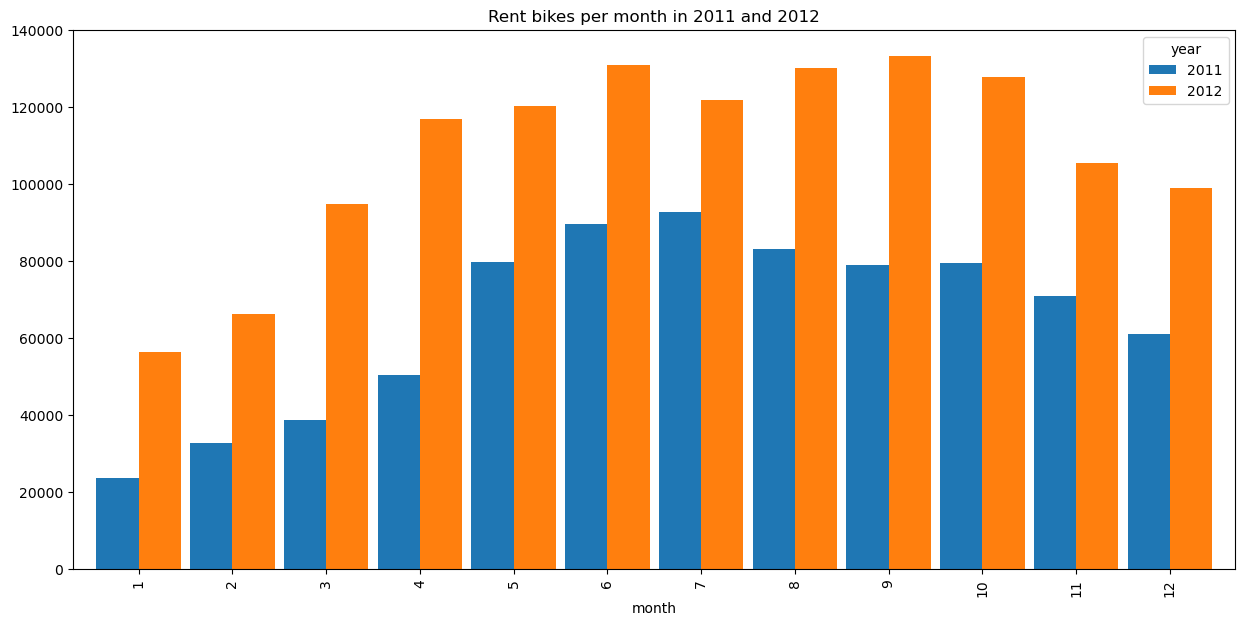

In [31]:
# method for creating the count plot based on year

def plot_by_year(agg_attr,title): # extracting the required fields
    dd=df.copy()
    dd['year'] = df.datetime.dt.year # extratcing the year
    dd['month'] = df.datetime.dt.month  # extratcing the month
    dd['hour'] = df.datetime.dt.hour  # extratcing the hour
    by_year =dd.groupby([agg_attr,'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar',figsize=(15,7),width=0.9,title=title) # returning the figure grouped by year


plot_by_year('month',"Rent bikes per month in 2011 and 2012")# plotting monthly bike rentals based on year

<Axes: title={'center': 'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

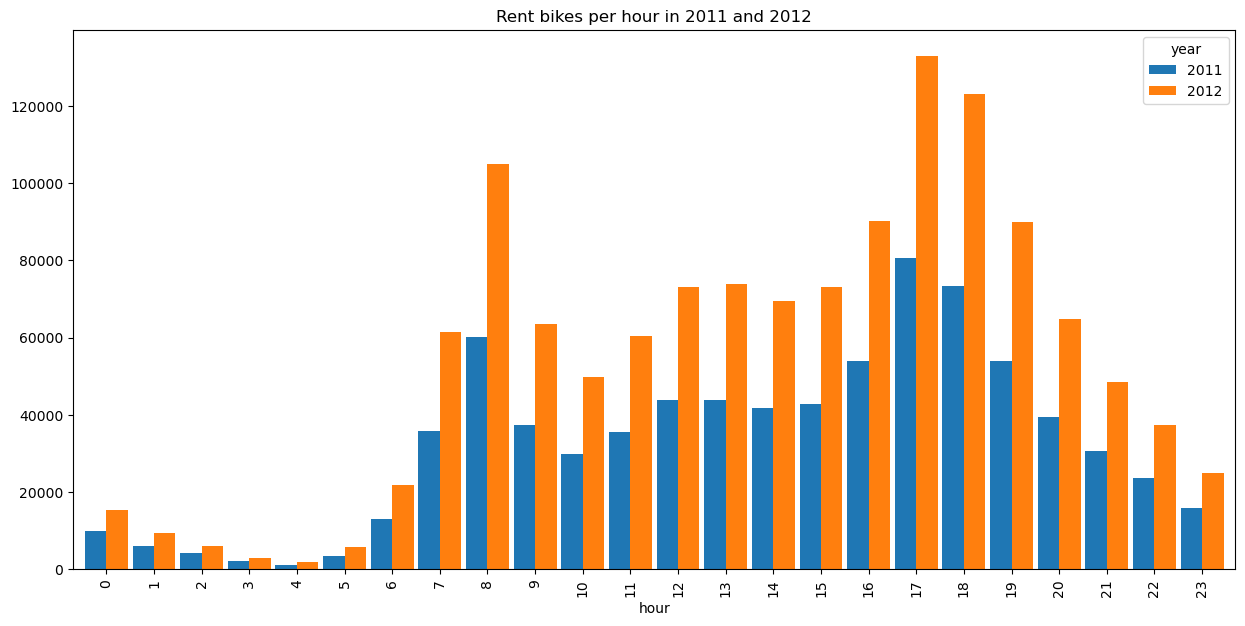

In [32]:
plot_by_year('hour',"Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year

In [33]:
#methos to plot a graph for count per hour
def plot_hours(data,message = ""): # extracting the required fields
    dd = data.copy()
    dd['hour']=data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour]= dd[dd.hour==hour]['count'].values
    
    plt.figure(figsize=(20,10))
    plt.ylabel("Count Rent")
    plt.xlabel("Hours")
    plt.title("Count vs hours\n"+ message)
    plt.boxplot([hours[hour] for hour in range(24)])
    
    axis = plt.gca()
    axis.set_ylim([1,1100])

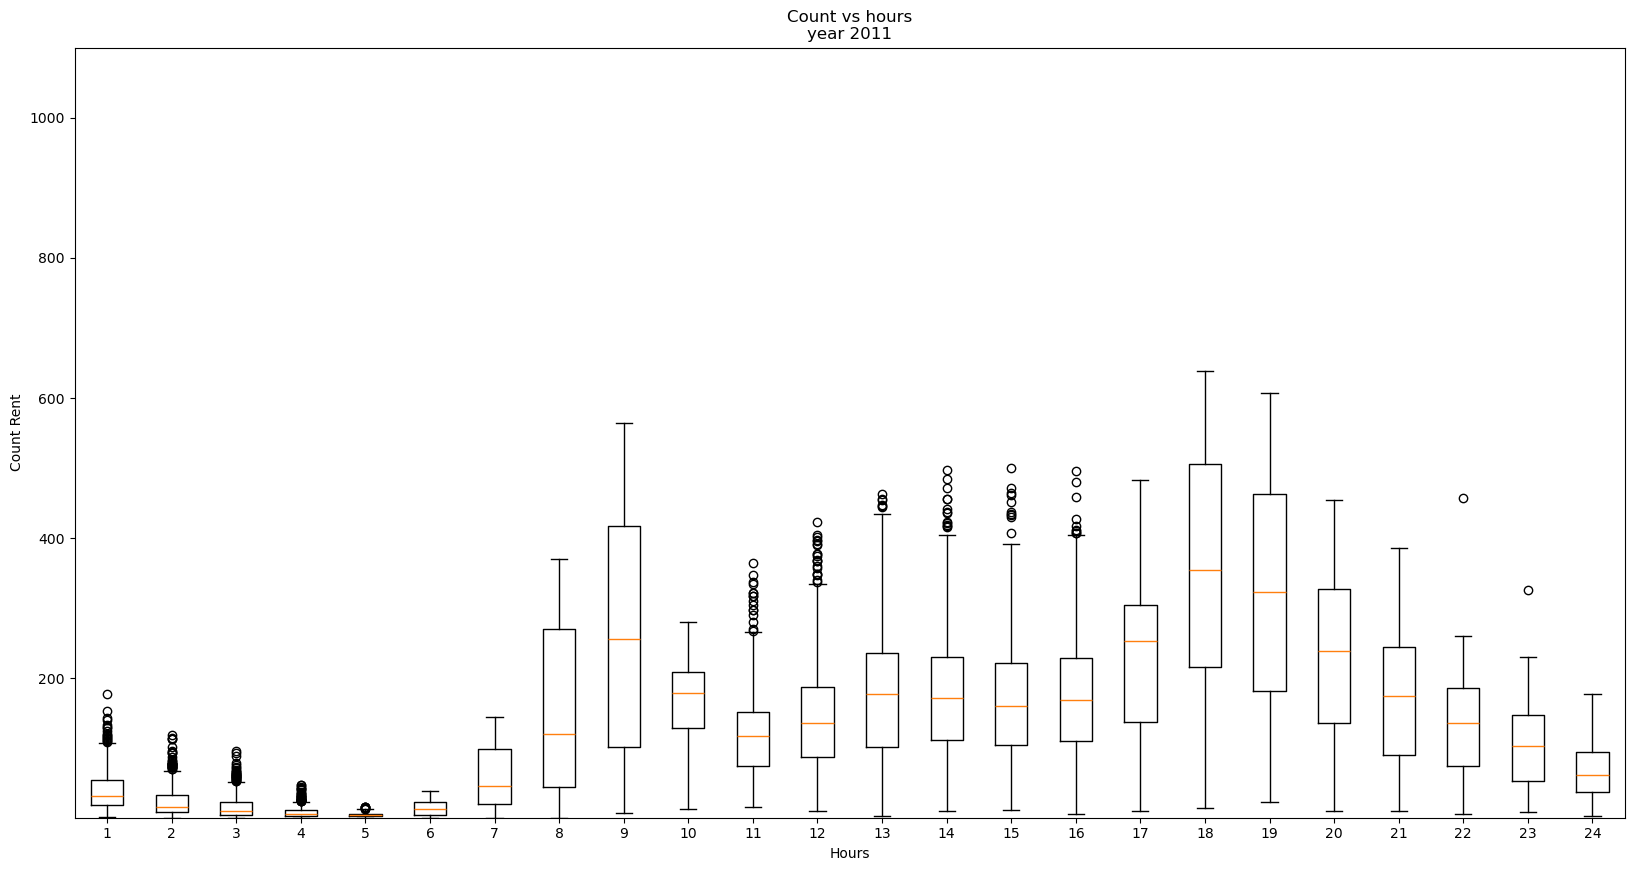

In [34]:
plot_hours(df[df.datetime.dt.year==2011],"year 2011") # box plot for hourly count for the mentioned year

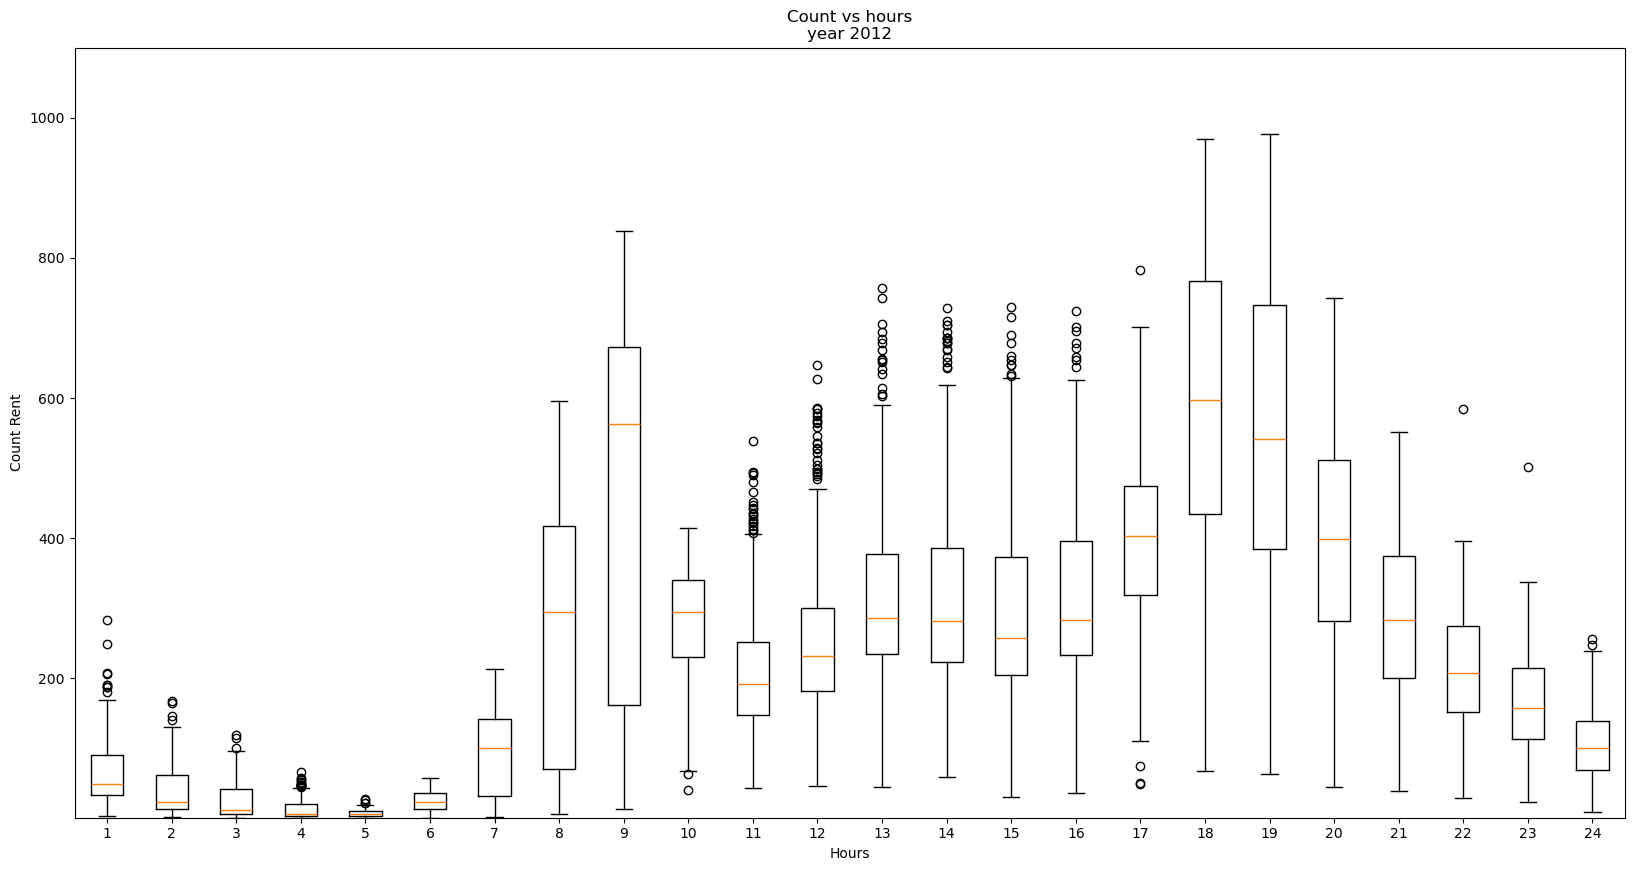

In [35]:
plot_hours(df[df.datetime.dt.year==2012],"year 2012") # box plot for hourly count for the mentioned year

In [36]:
dt=pd.to_datetime(df["datetime"]) #converting the colum to datatime for df dataset
df['hour']=dt.map(lambda x: x.hour) #adding the hour column for df dataset
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     1  
2        80        0.0       5          27     32     2  
3        75        0.0       3          10     13     3  
4        75        0.0       0           1      1     4

In [37]:
dt_test=pd.to_datetime(df_test["datetime"]) #converting the colum to datatime for df dataset
df_test['hour']=dt.map(lambda x: x.hour) #adding the hour column for df dataset
dt_test.head()

0   2011-01-20 00:00:00
1   2011-01-20 01:00:00
2   2011-01-20 02:00:00
3   2011-01-20 03:00:00
4   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

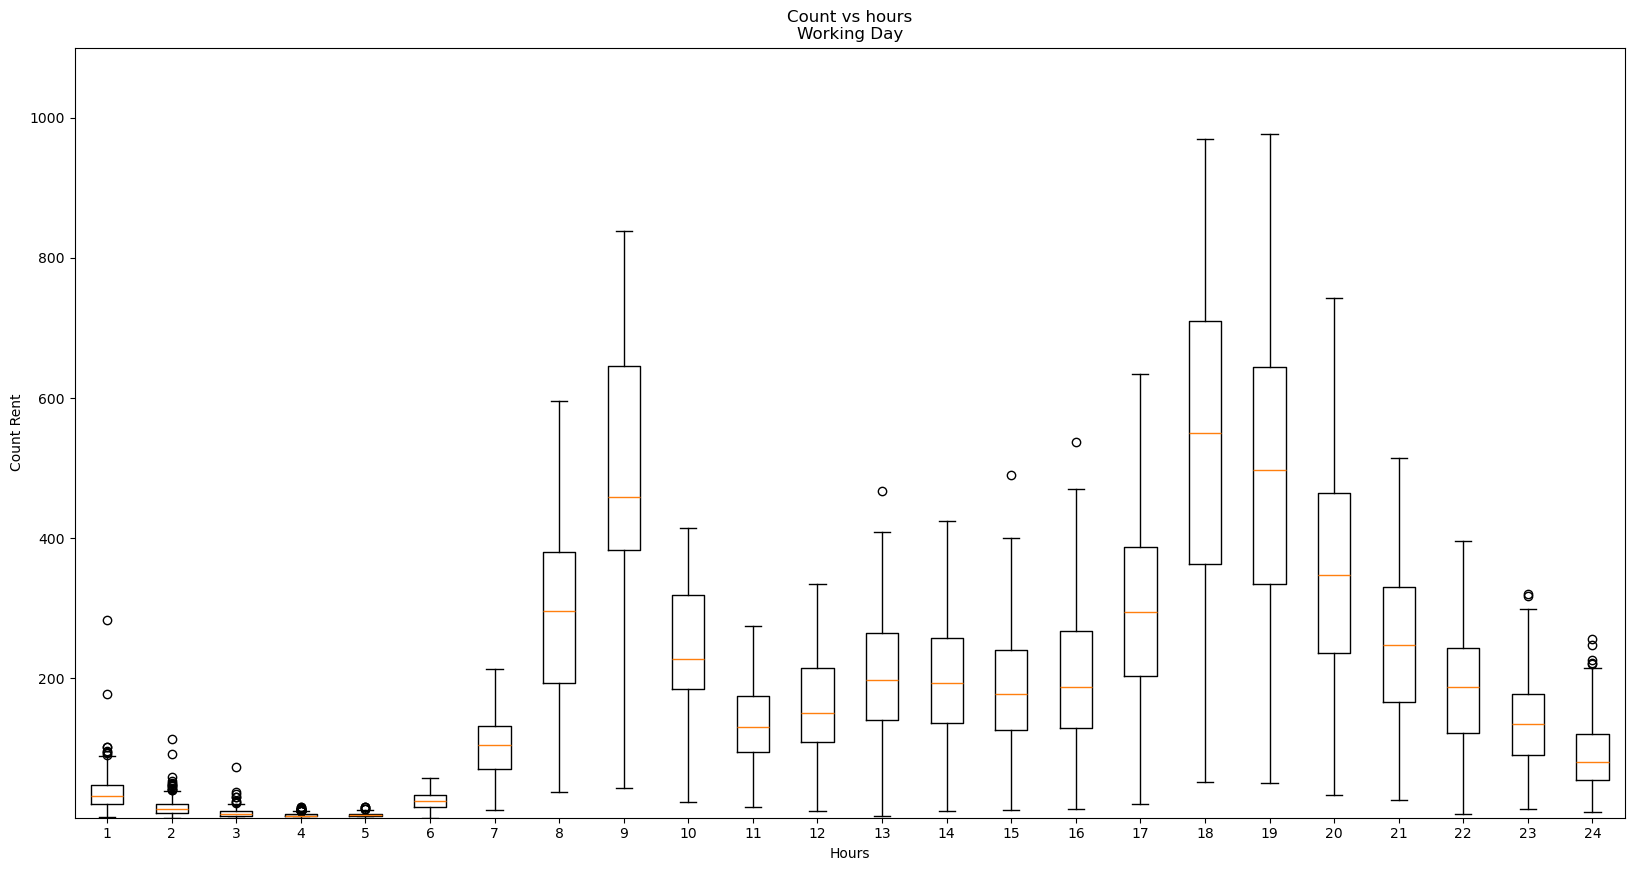

In [38]:
plot_hours(df[df.workingday==1],'Working Day') # plotting hourly count of rented bikes for working days for a given year

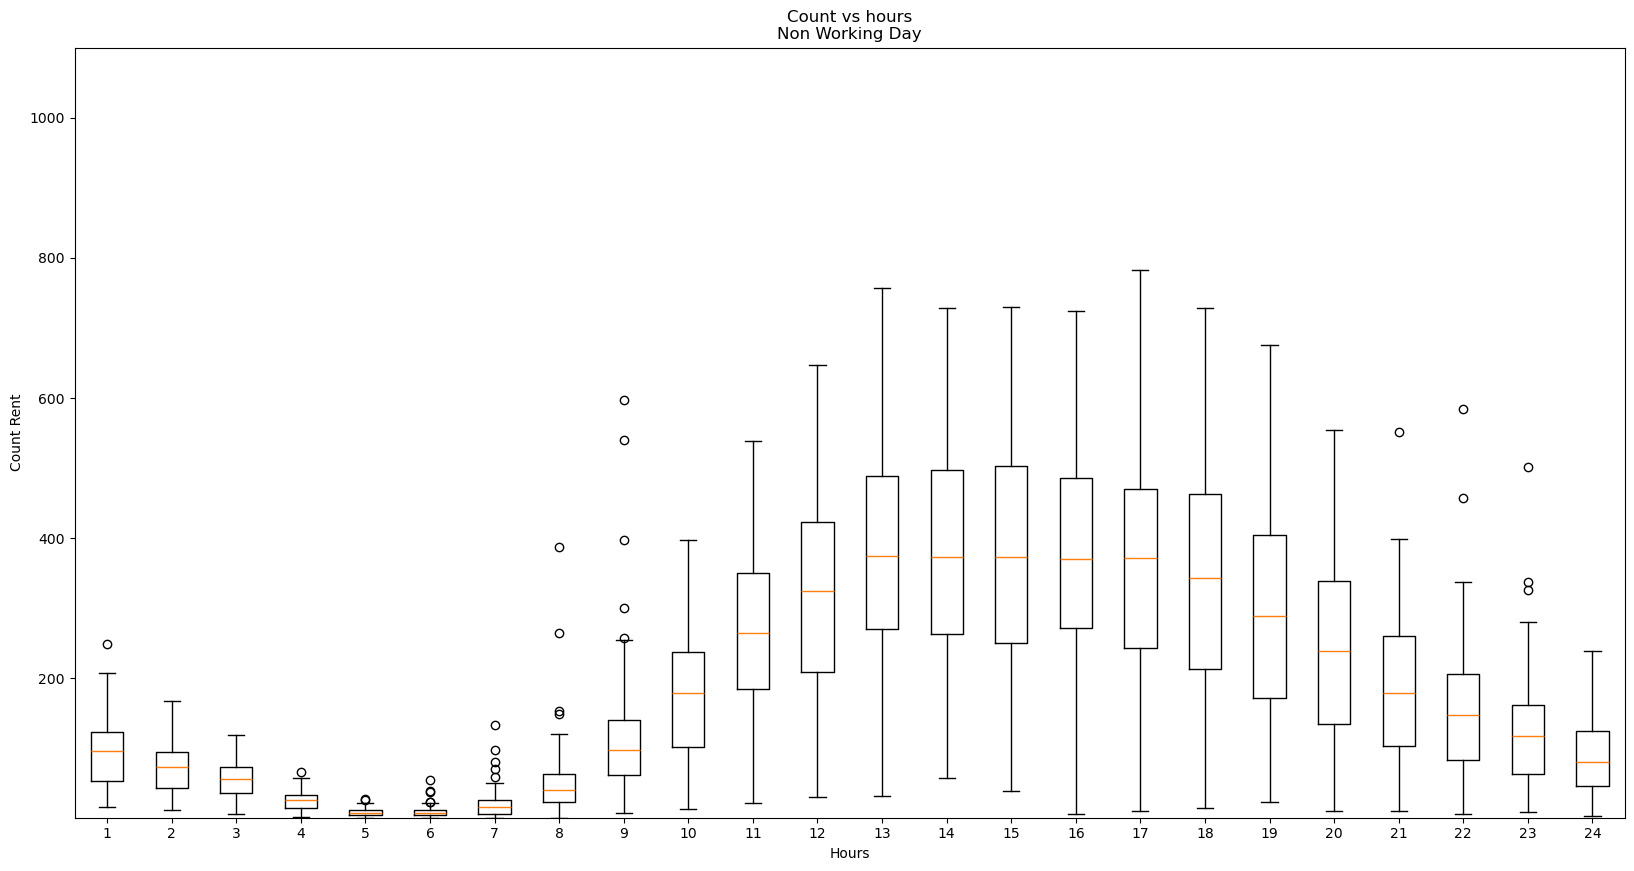

In [39]:
plot_hours(df[df.workingday==0],"Non Working Day")# plotting hourly count of rented bikes for non-working days for a given year

In [40]:
#method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [41]:
df['hour']=df['hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     0  
2        80        0.0       5          27     32     0  
3        75        0.0       3          10     13     0  
4        75        0.0       0           1      1     0

In [42]:
df_test['hour']=df_test['hour'].apply(categorical_to_numeric)
df_test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  
0        56    26.0027     0  
1        56     0.0000     0  
2        56     0.0000     0  
3        56    11.0014     0  
4        56    11.0014     0

In [43]:
#drop unnecessary columns
df=df.drop(['datetime'],axis = 1)

In [44]:
df_test=df_test.drop(['datetime'],axis = 1)

In [45]:
df.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  hour  
0       3          13     16     0  
1       8          32     40     0  
2       5          27     32     0  
3       3          10     13     0  
4       0           1      1     0

In [46]:
df_test.head()

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0

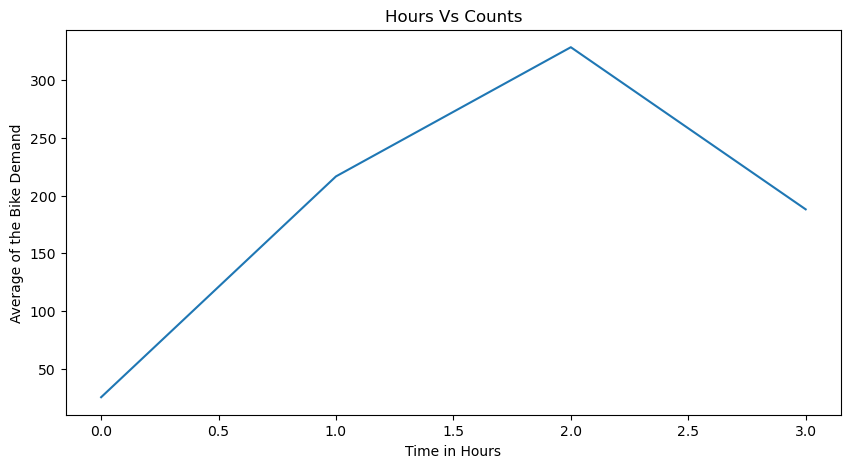

In [47]:
# an hour bs Count graph depicting average bike demand based on the hour 
figure,axes=plt.subplots(figsize = (10,5))
hours = df.groupby(['hour']).agg('mean')["count"]
hours.plot(kind="line",ax = axes)
plt.title("Hours Vs Counts")
axes.set_xlabel("Time in Hours")
axes.set_ylabel("Average of the Bike Demand")
plt.show()

In [48]:
#count of different temp values 
a= df.groupby("temp")[['count']].mean()
a

count
temp             
0.82    77.714286
1.64    91.500000
2.46    43.000000
3.28    19.272727
4.10    50.272727
4.92    58.416667
5.74    53.233645
6.56    68.109589
7.38    67.754717
8.20    81.995633
9.02    73.616935
9.84    86.442177
10.66   92.560241
11.48  111.066298
12.30  120.002597
13.12  148.547753
13.94  145.053269
14.76  152.957173
15.58  179.682353
16.40  170.217500
17.22  182.609551
18.04  160.878049
18.86  159.692118
19.68  185.058824
20.50  204.672783
21.32  196.480663
22.14  184.717122
22.96  212.392405
23.78  235.650246
24.60  237.182051
25.42  222.062035
26.24  232.403974
27.06  211.025381
27.88  203.433036
28.70  257.679157
29.52  277.691218
30.34  303.193980
31.16  352.801653
31.98  318.683673
32.80  355.623762
33.62  348.323077
34.44  340.225000
35.26  342.934211
36.08  362.869565
36.90  318.717391
37.72  332.176471
38.54  238.857143
39.36  317.833333
41.00  294.000000

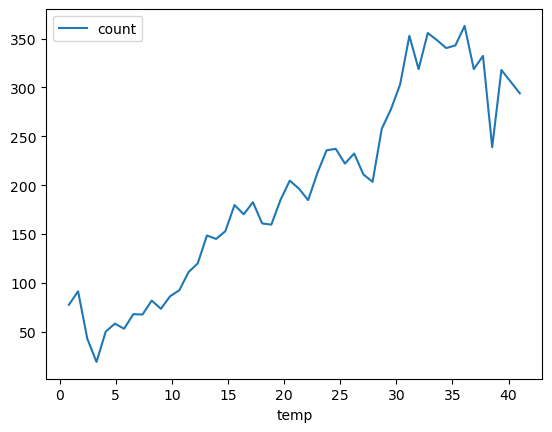

In [49]:
a.plot()
plt.show()

In [50]:
# count of different atem values
b = df.groupby('atemp')[['count']].mean()
b

count
atemp             
0.760     1.000000
1.515     3.000000
2.275    38.000000
3.030    82.285714
3.790    39.062500
4.545    66.090909
5.305    63.200000
6.060    64.876712
6.820    56.380952
7.575    55.933333
8.335    58.444444
9.090    80.000000
9.850    81.456693
10.605   95.951807
11.365   90.442804
12.120  102.656410
12.880   89.518219
13.635   94.308017
14.395  116.483271
15.150  133.967456
15.910  133.897638
16.665  148.509186
17.425  147.799363
18.180  133.585366
18.940  149.555556
19.695  179.682353
20.455  170.217500
21.210  182.609551
21.970  160.878049
22.725  159.692118
23.485  185.058824
24.240  204.672783
25.000  195.109589
25.760  179.626478
26.515  212.392405
27.275  200.503546
28.030  133.312500
28.790  142.771429
29.545  151.046693
30.305  227.291429
31.060  308.323398
31.820  258.655518
32.575  331.746324
33.335  244.107143
34.090  295.183036
34.850  277.448763
35.605  312.144654
36.365  349.243902
37.120  334.144068
37.880  351.835052
38.635  335.783784
39.395  319.194030
40.150  369.577778
40.910  324.512821
41.665  281.434783
42.425  301.958333
43.180  307.142857
43.940  215.428571
44.695  354.333333
45.455  312.000000

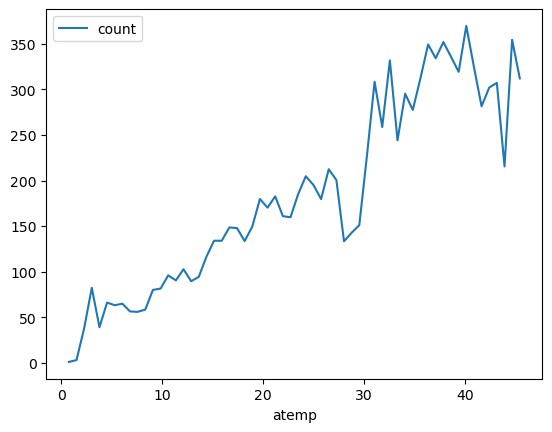

In [51]:
b.plot()
plt.show()

In [52]:
#count based on holiday
a = df.groupby("holiday")[['count']].mean()
a

count
holiday            
0        191.741655
1        185.877814

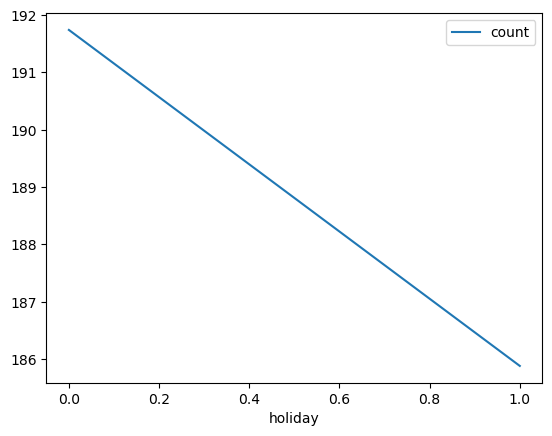

In [53]:
a.plot()
plt.show()